<a href="https://colab.research.google.com/github/AnaClarice382/BootCamp_MachineLearning/blob/master/TensorFlow_Flores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

In [ ]:
import pathlib
data_dir = tf.keras.utils.get_file(origin='https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz', fname='flower_photos', untar=True)

data_dir = pathlib.Path(data_dir)

228818944/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [ ]:
CLASS_NAMES = np.array([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"])
CLASS_NAMES

array(['dandelion', 'roses', 'daisy', 'tulips', 'sunflowers'],
      dtype='<U10')

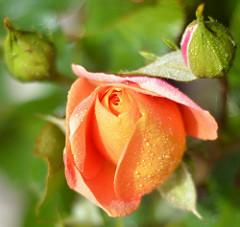

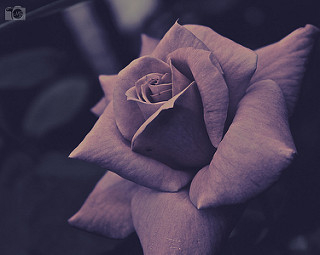

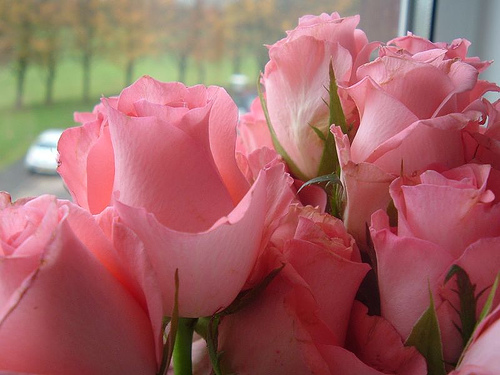

In [ ]:
roses = list(data_dir.glob('roses/*'))

for image_path in roses[:3]:
  display.display(Image.open(str(image_path)))

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
STEPS_PER_EPOCH = np.ceil(image_count/BATCH_SIZE)

In [ ]:
train_data_gen = image_generator.flow_from_directory(directory=str(data_dir), 
                                                     batch_size=BATCH_SIZE,
                                                     shuffle=True, target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     classes = list(CLASS_NAMES))

Found 3670 images belonging to 5 classes.


In [ ]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(10,10))
  for n in range(25):
    ax = plt.subplot(5,5,n+1)
    plt.imshow(image_batch[n])
    plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
    plt.axis('off')

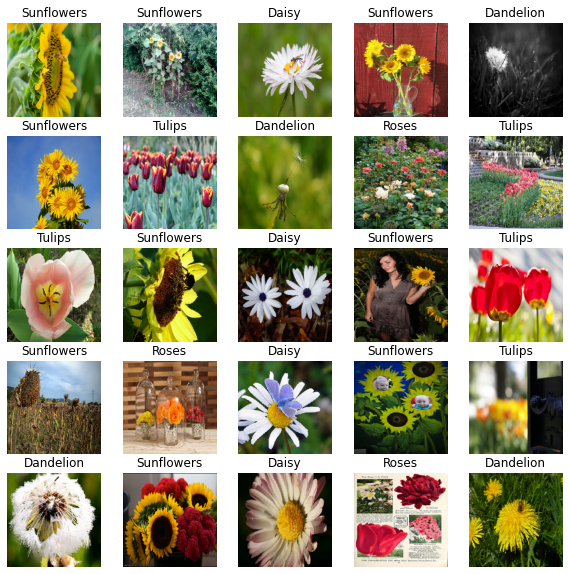

In [ ]:
image_batch, label_batch = next(train_data_gen)
show_batch(image_batch, label_batch)

In [ ]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'))

In [ ]:
for f in list_ds.take(5):
  print(f.numpy())

b'/root/.keras/datasets/flower_photos/roses/2471103806_87ba53d997_n.jpg'
b'/root/.keras/datasets/flower_photos/dandelion/4575406391_7a62c5f90f_n.jpg'
b'/root/.keras/datasets/flower_photos/tulips/8673412732_f8fd690ee4_n.jpg'
b'/root/.keras/datasets/flower_photos/sunflowers/9535500195_543d0b729b.jpg'
b'/root/.keras/datasets/flower_photos/daisy/5054771689_00dd40b971_n.jpg'


In [ ]:
def get_label(file_path):
  #convert the path to list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  #the second to last is the class-directory
  return parts[-2] == CLASS_NAMES

In [ ]:
def decode_img(img):
  #convert the compressed string a 3d uint8 tensor
  img = tf.image.decode_jpeg(img, channels=3)
  #use convert_img_dtype to convert to floats in the [0,1] range
  img = tf.image.convert_image_dtype(img, tf.float32)
  #resize the image to the desired size
  return tf.image.resize(img, [IMG_HEIGHT, IMG_WIDTH])

In [ ]:
def process_path(file_path):
  label = get_label(file_path)
  #load the raw data from the file as string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

In [ ]:
#set num_parallel_calls so multiple images are loaded/processed in parallel
labeled_ds = list_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [ ]:
for image, label in labeled_ds.take(1):
  print("Image shape:", image.numpy().shape)
  print("Label:", label.numpy())

Image shape: (224, 224, 3)
Label: [False False False  True False]


In [ ]:
def prepare_for_training(ds, cache=True, shuffle_buffer_size=1000):
  if cache:
    if isinstance(cache, str):
      ds = ds.cache(cache)
    else:
      ds = ds.cache()

  ds = ds.shuffle(buffer_size=shuffle_buffer_size)

  ds = ds.repeat()
  ds = ds.batch(BATCH_SIZE)

  ds = ds.prefetch(buffer_size=AUTOTUNE)

  return ds

In [ ]:
train_ds = prepare_for_training(labeled_ds)
image_batch, label_batch = next(iter(train_ds))

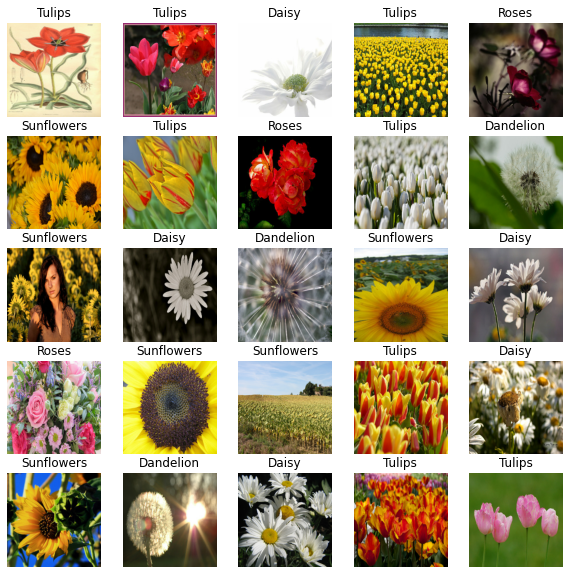

In [ ]:
show_batch(image_batch.numpy(), label_batch.numpy())

In [ ]:
import time
default_timeit_steps = 1000

def timeit(ds, steps=default_timeit_steps):
  start = time.time()
  it = iter(ds)
  for i in range(steps):
    batch = next(it)
    if i%10 == 0:
      print('.',end='')
    print()
    end = time.time()

    duration = end-start
    print("{} batches: {} s".format(steps, duration))
    print("{:0.5f} Images/s".format(BATCH_SIZE * steps/duration))\

In [ ]:
#keras.preprocessing
timeit(train_data_gen)

.
1000 batches: 0.17378473281860352 s
184135.85291 Images/s

1000 batches: 0.2884938716888428 s
110920.90037 Images/s

1000 batches: 0.38368701934814453 s
83401.30989 Images/s

1000 batches: 0.4904031753540039 s
65252.43230 Images/s

1000 batches: 0.5980648994445801 s
53505.89882 Images/s

1000 batches: 0.7051661014556885 s
45379.37932 Images/s

1000 batches: 0.8152313232421875 s
39252.66251 Images/s

1000 batches: 0.9213099479675293 s
34733.15367 Images/s

1000 batches: 1.0181915760040283 s
31428.27023 Images/s

1000 batches: 1.1205158233642578 s
28558.27587 Images/s
.
1000 batches: 1.2212212085723877 s
26203.27896 Images/s

1000 batches: 1.3161752223968506 s
24312.87222 Images/s

1000 batches: 1.4153873920440674 s
22608.65130 Images/s

1000 batches: 1.520655870437622 s
21043.55142 Images/s

1000 batches: 1.6158897876739502 s
19803.33080 Images/s

1000 batches: 1.7348296642303467 s
18445.61496 Images/s

1000 batches: 1.8291676044464111 s
17494.29627 Images/s

1000 batches: 1.927021265

In [ ]:
#tf.data
timeit(train_ds)

.
1000 batches: 2.1864993572235107 s
14635.26614 Images/s

1000 batches: 2.282780647277832 s
14017.99163 Images/s

1000 batches: 2.359684467315674 s
13561.13516 Images/s

1000 batches: 2.4528658390045166 s
13045.96423 Images/s

1000 batches: 2.5260984897613525 s
12667.75628 Images/s

1000 batches: 2.6097066402435303 s
12261.91462 Images/s

1000 batches: 2.6978862285614014 s
11861.13768 Images/s

1000 batches: 2.772935152053833 s
11540.11841 Images/s

1000 batches: 2.853443145751953 s
11214.52167 Images/s

1000 batches: 2.9476840496063232 s
10855.98031 Images/s
.
1000 batches: 3.029163122177124 s
10563.97385 Images/s

1000 batches: 3.117548704147339 s
10264.47476 Images/s

1000 batches: 3.214150905609131 s
9955.97311 Images/s

1000 batches: 3.2953896522521973 s
9710.53604 Images/s

1000 batches: 3.3842952251434326 s
9455.43987 Images/s

1000 batches: 3.4717352390289307 s
9217.29274 Images/s

1000 batches: 3.5559730529785156 s
8998.94333 Images/s

1000 batches: 3.638366937637329 s
8795.1

In [ ]:
#parte do ganho de desempenho vem do uso do cache
uncached_ds = prepare_for_training(labeled_ds, cache=False)
timeit(uncached_ds)

.
1000 batches: 2.439521074295044 s
13117.32878 Images/s

1000 batches: 2.516726016998291 s
12714.93193 Images/s

1000 batches: 2.591294288635254 s
12349.04123 Images/s

1000 batches: 2.663085460662842 s
12016.13710 Images/s

1000 batches: 2.729811429977417 s
11722.42143 Images/s

1000 batches: 2.7886838912963867 s
11474.94705 Images/s

1000 batches: 2.8464746475219727 s
11241.97612 Images/s

1000 batches: 2.9181928634643555 s
10965.69058 Images/s

1000 batches: 2.9777581691741943 s
10746.33942 Images/s

1000 batches: 3.044264793395996 s
10511.56919 Images/s
.
1000 batches: 3.1074752807617188 s
10297.74885 Images/s

1000 batches: 3.17018985748291 s
10094.03267 Images/s

1000 batches: 3.2294201850891113 s
9908.89948 Images/s

1000 batches: 3.297318696975708 s
9704.85505 Images/s

1000 batches: 3.36676025390625 s
9504.68628 Images/s

1000 batches: 3.432157516479492 s
9323.58141 Images/s

1000 batches: 3.5001559257507324 s
9142.44984 Images/s

1000 batches: 3.565930128097534 s
8973.81576 

In [ ]:
filecache_ds = prepare_for_training(labeled_ds, cache="./flowers.tfcache")
timeit(filecache_ds)

.
1000 batches: 3.4330101013183594 s
9321.26590 Images/s

1000 batches: 3.5340938568115234 s
9054.65483 Images/s

1000 batches: 3.62744140625 s
8821.64491 Images/s

1000 batches: 3.774463415145874 s
8478.02627 Images/s

1000 batches: 3.93339467048645 s
8135.46635 Images/s

1000 batches: 4.068757772445679 s
7864.80832 Images/s

1000 batches: 4.19303560256958 s
7631.70243 Images/s

1000 batches: 4.279629230499268 s
7477.28326 Images/s

1000 batches: 4.375898122787476 s
7312.78451 Images/s

1000 batches: 4.4663755893707275 s
7164.64600 Images/s
.
1000 batches: 4.573007583618164 s
6997.58297 Images/s

1000 batches: 4.698162317276001 s
6811.17378 Images/s

1000 batches: 4.85391092300415 s
6592.62201 Images/s

1000 batches: 4.983532428741455 s
6421.14814 Images/s

1000 batches: 5.08659553527832 s
6291.04472 Images/s

1000 batches: 5.1886255741119385 s
6167.33652 Images/s

1000 batches: 5.27386212348938 s
6067.65957 Images/s

1000 batches: 5.372008323669434 s
5956.80388 Images/s

1000 batches

In [ ]:
CLASS_NAMES

array(['dandelion', 'roses', 'daisy', 'tulips', 'sunflowers'],
      dtype='<U10')